<a href="https://colab.research.google.com/github/samvaadi/AI-ML/blob/main/Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
df = pd.read_csv('/final_dataset.csv')

df.head()

,Unnamed: 0,Country,Player,Team,Base price,Winning bid,Year
0,0,Guyana,Christopher Barnwell,Royal Challengers Bangalore,30.5,30.5,2013
1,1,South Africa,Johan Botha,Delhi Daredevils,183.0,274.5,2013
2,2,Australia,Daniel Christian,Royal Challengers Bangalore,61.0,61.0,2013
3,3,Australia,Michael Clarke,Pune Warriors India,244.0,244.0,2013
4,4,Australia,Nathan Coulter-Nile,Mumbai Indians,61.0,274.5,2013


In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
Country,0
Player,0
Team,0
Base price,0
Winning bid,0
Year,0


In [ ]:
df[df['Base price'] == df['Base price'].max()]

,Unnamed: 0,Country,Player,Team,Base price,Winning bid,Year
3,3,Australia,Michael Clarke,Pune Warriors India,244.0,244.0,2013
27,27,Australia,Ricky Ponting,Mumbai Indians,244.0,244.0,2013


In [ ]:
df[df['Winning bid'] == df['Winning bid'].max()]

,Unnamed: 0,Country,Player,Team,Base price,Winning bid,Year
437,437,Australia,Chris Lynn,Kolkata Knight Riders,200.0,960,2018


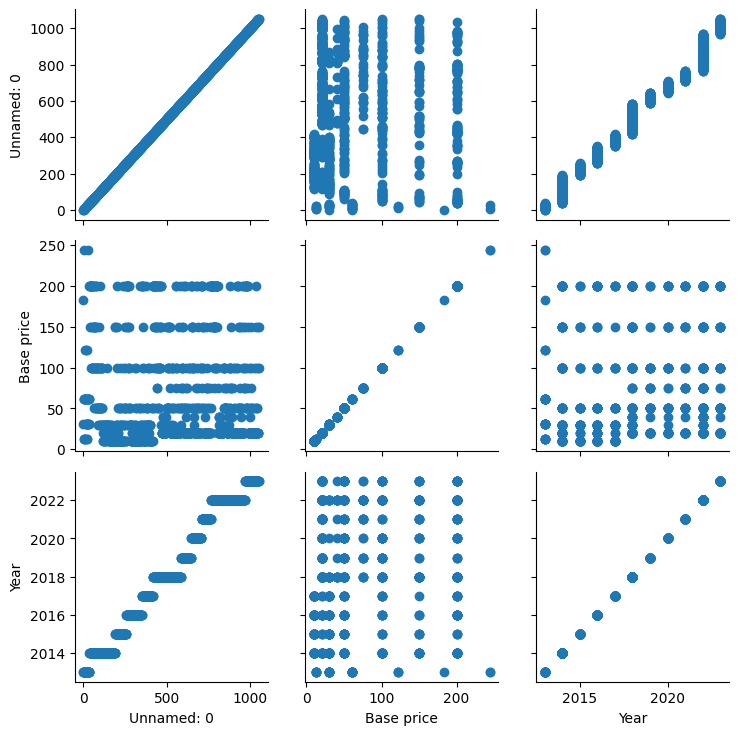

In [ ]:
g = sns.PairGrid(df)
g.map(plt.scatter);

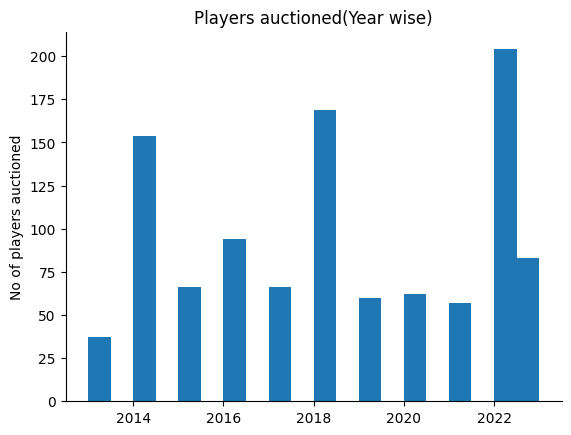

In [ ]:
# @title Players auctioned vs Year

from matplotlib import pyplot as plt
df['Year'].plot(kind='hist', bins=20, title='Players auctioned(Year wise)')
plt.ylabel('No of players auctioned')
plt.gca().spines[['top', 'right',]].set_visible(False)

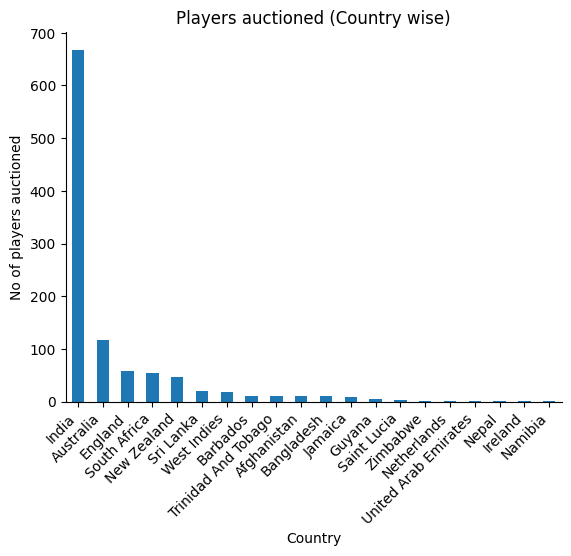

In [ ]:
# @title Players auctioned vs Country
df['Country'] = df['Country'].str.strip().str.title()
df['Country'].value_counts().plot(kind='bar', title='Players auctioned (Country wise)')
plt.ylabel('No of players auctioned')
plt.xticks(rotation=45, ha='right')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

In [ ]:
num_df = df.select_dtypes(include=['number'])
corr = num_df.corr()
corr

,Unnamed: 0,Base price,Year
Unnamed: 0,1.000000,0.000672,0.989776
Base price,0.000672,1.000000,0.063879
Year,0.989776,0.063879,1.000000


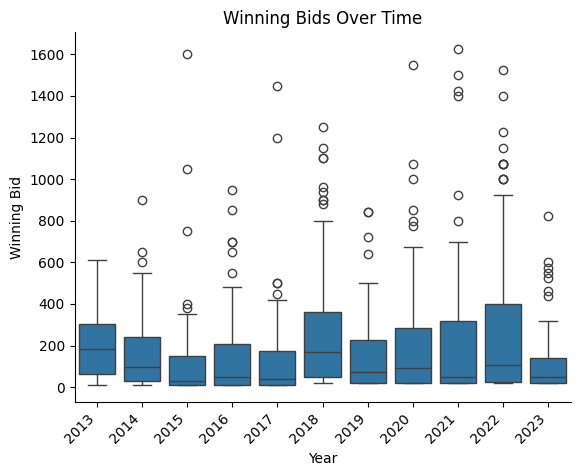

In [ ]:
# @title Winning bids over time
sns.boxplot(x='Year', y='Winning bid', data=df)
plt.title('Winning Bids Over Time')
plt.xlabel('Year')
plt.ylabel('Winning Bid')
plt.xticks(rotation=45, ha='right')
plt.gca().spines[['top', 'right']].set_visible(False)

plt.show()

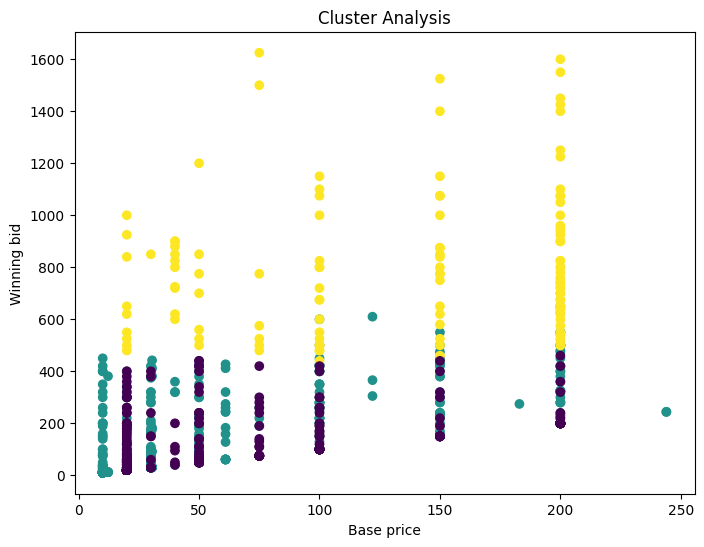

In [ ]:
 # @title Base price vs Winning bid
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer

n_data = df.select_dtypes(include=['number'])

imputer = SimpleImputer(strategy='mean')
n_data = pd.DataFrame(imputer.fit_transform(n_data), columns=n_data.columns, index=n_data.index)

kmeans = KMeans(n_clusters=3)
kmeans.fit(n_data)
labels = kmeans.labels_


df['Cluster'] = labels


plt.figure(figsize=(8, 6))
plt.scatter(df['Base price'], df['Winning bid'], c=df['Cluster'])  # Example using two features
plt.ylabel('Winning bid')
plt.xlabel('Base price')
plt.title('Cluster Analysis')
plt.show()

<ipython-input-54-b2bc259517da>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Team', y='Winning bid', data=df, palette='pastel')


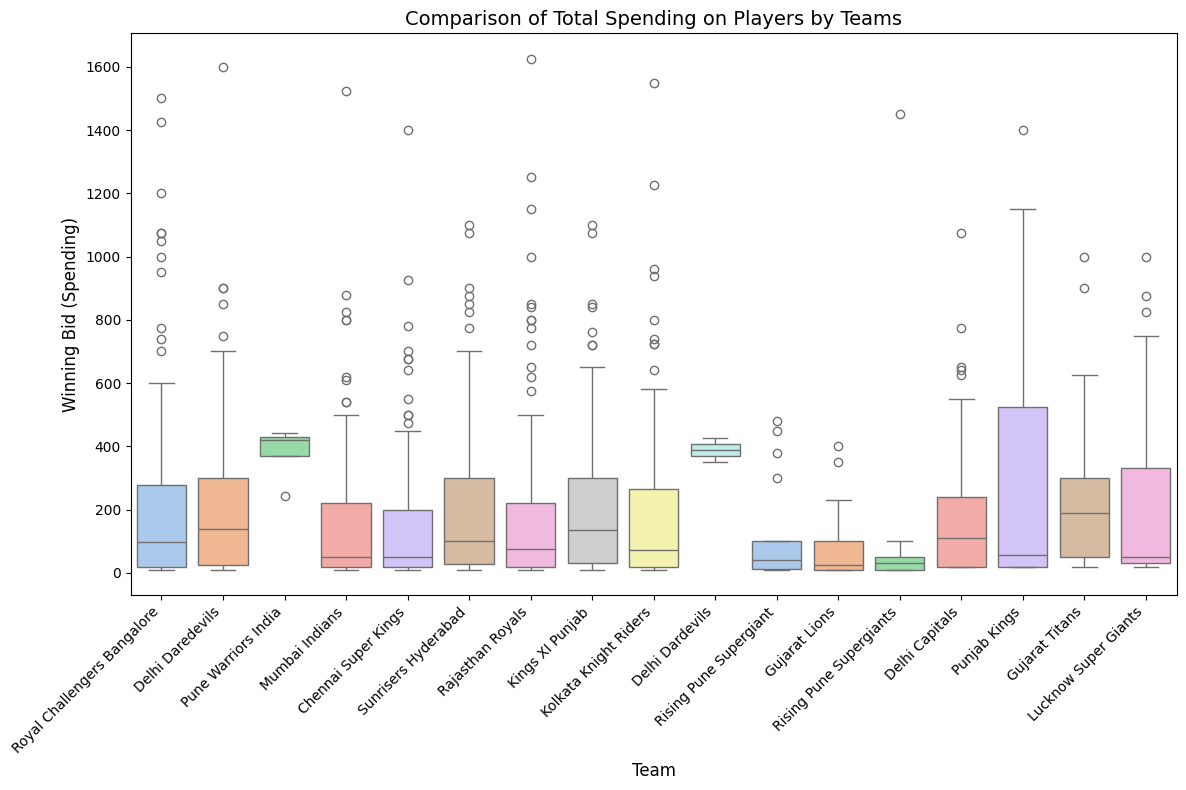

In [ ]:
 # @title Total spending by each team
df['Winning bid'] = pd.to_numeric(df['Winning bid'], errors='coerce')


plt.figure(figsize=(12, 8))
sns.boxplot(x='Team', y='Winning bid', data=df, palette='pastel')
plt.title('Comparison of Total Spending on Players by Teams', fontsize=14)
plt.xlabel('Team', fontsize=12)
plt.ylabel('Winning Bid (Spending)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

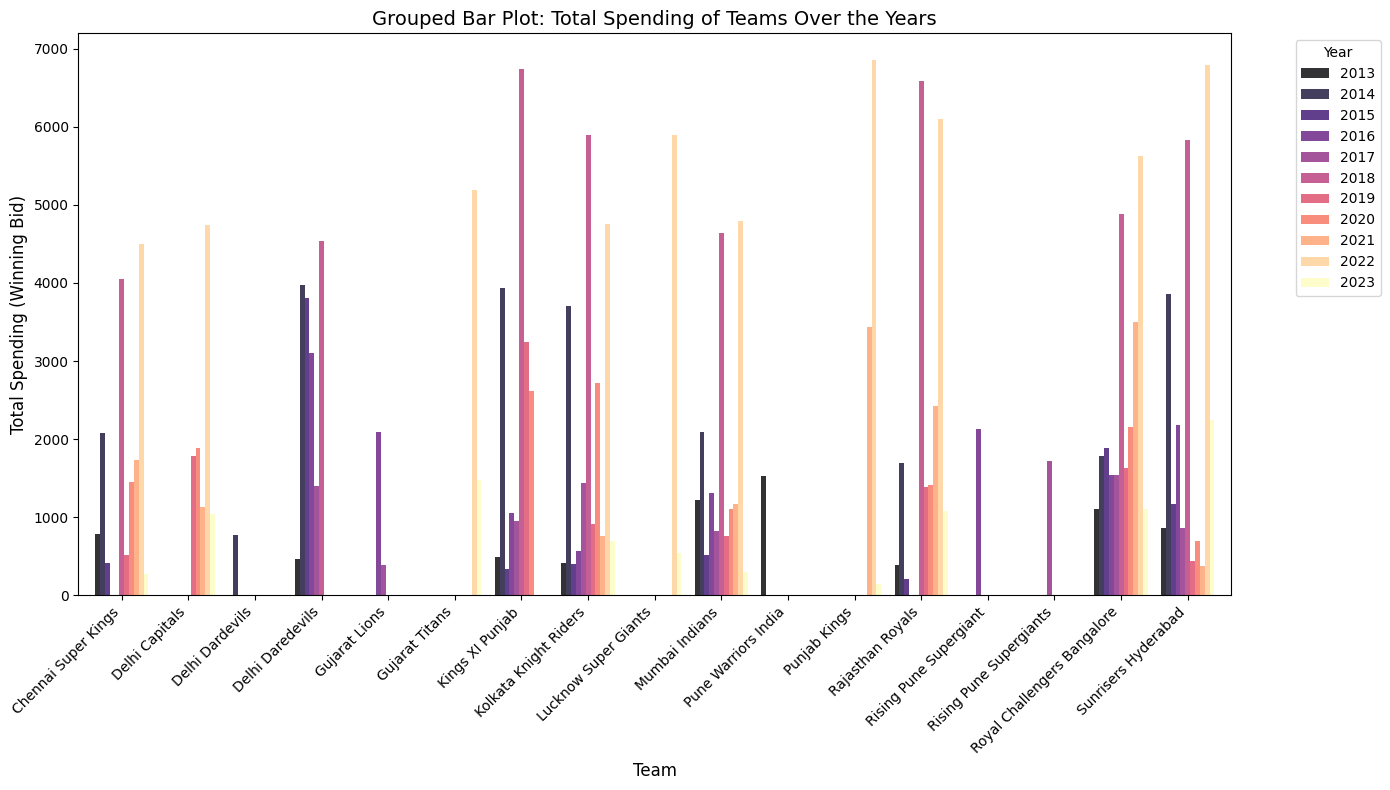

In [ ]:
 # @title Spending(on players) by each team over the years


grouped_data = df.groupby(['Team', 'Year'])['Winning bid'].sum().reset_index()


pivot_data = grouped_data.pivot(index='Team', columns='Year', values='Winning bid').fillna(0)


plt.figure(figsize=(12, 8))
pivot_data.plot(kind='bar', figsize=(14, 8), colormap='magma', alpha=0.8, width=0.8)
plt.title('Grouped Bar Plot: Total Spending of Teams Over the Years', fontsize=14)
plt.xlabel('Team', fontsize=12)
plt.ylabel('Total Spending (Winning Bid)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
